# Random Forest

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

**Carga de datos**

In [24]:

data_test=pd.read_csv("/workspaces/Isa-Random-Forest-OK/data/processed/clean_test.csv")
data_train=pd.read_csv("/workspaces/Isa-Random-Forest-OK/data/processed/clean_train.csv")

data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    614 non-null    float64
 1   Glucose        614 non-null    float64
 2   BloodPressure  614 non-null    float64
 3   BMI            614 non-null    float64
 4   Age            614 non-null    float64
 5   Outcome        614 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 28.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    154 non-null    float64
 1   Glucose        154 non-null    float64
 2   BloodPressure  154 non-null    float64
 3   BMI            154 non-null    float64
 4   Age            154 non-null    float64
 5   Outcome        154 non-null    int64  
dtypes: float64(5), int64(1)
memory u

In [25]:
X_train=data_train.drop("Outcome",axis=1,inplace=False)
y_train=data_train["Outcome"].copy()
X_test=data_test.drop("Outcome",axis=1,inplace=False)
y_test=data_test["Outcome"].copy()

X_train.info()
y_train.info()
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    614 non-null    float64
 1   Glucose        614 non-null    float64
 2   BloodPressure  614 non-null    float64
 3   BMI            614 non-null    float64
 4   Age            614 non-null    float64
dtypes: float64(5)
memory usage: 24.1 KB
<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
614 non-null    int64
dtypes: int64(1)
memory usage: 4.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    154 non-null    float64
 1   Glucose        154 non-null    float64
 2   BloodPressure  154 non-null    float64
 3   BMI            154 non-

Inicializamos el modelo

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

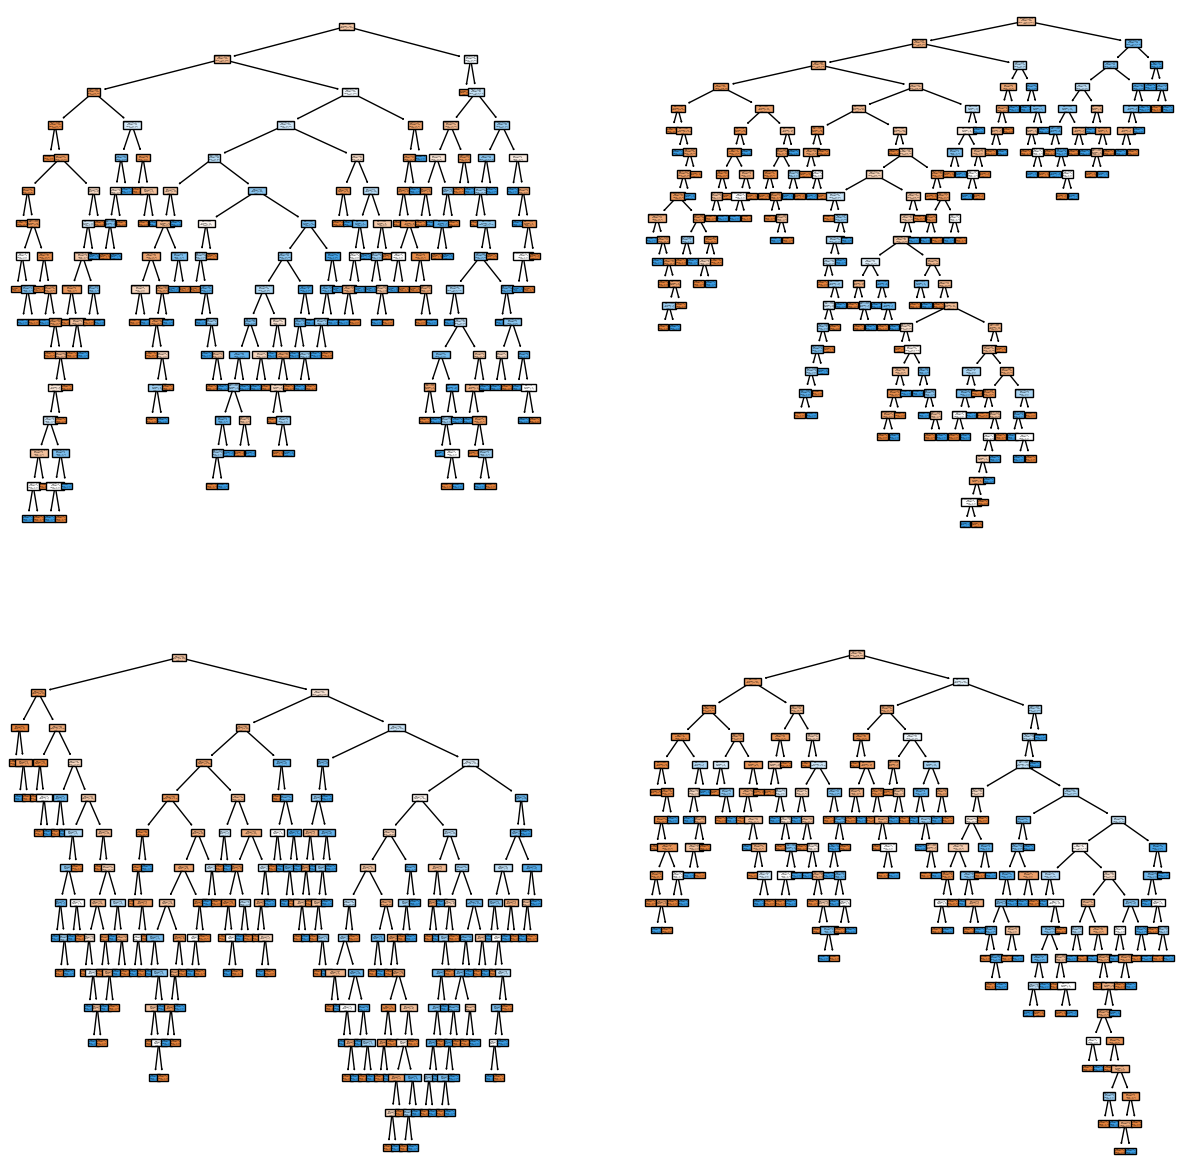

In [36]:
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [38]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.6948051948051948

Los hiperparámetros utilizados por el modelo son:

In [32]:
x=model.get_params()

print("Parámetros del árbol de decisión:")
for param, value in x.items():
    print(f"{param}: {value}")

Parámetros del árbol de decisión:
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


Con este modelo de Random Forest, tenemos un accuracy de 69,58%

Vamos a optimizar los hiperparámetros

In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "n_estimators": list(range(100,150,10)),
    "max_depth": list(range(5, 20)) + [None],
    "min_samples_split": list(range(2,35)) ,
    "min_samples_leaf": list(range(2, 10)),
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True,False],
    "criterion": ["gini", "entropy", "log_loss"]
}

In [34]:
#Generamos un bucle comparativo de modelos a través de los hiperparámetros mediante la búsqueda random para que no suponga una carga computacional muy alta.
#Vamos a realizar una búsqueda de hiperparámetros con distintos números de iteraciones, elegimos el mejor grupo de hiperparámetros, ajustamos y predecimos para calcular el accuracy,
#Realizamos el cálculo de la media de accuracy de 1000 ajustes y predicciones, para eliminar los sesgos.
#Posteriormente, elegimos el mejor grupo de parámetros
 
model_comparison=pd.DataFrame(columns=["Params","Accuracy"])


random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search.fit(X_train, y_train)

model_random = RandomForestClassifier(
        max_depth=random_search.best_params_["max_depth"],
        min_samples_split=random_search.best_params_["min_samples_split"],
        min_samples_leaf=random_search.best_params_["min_samples_leaf"],
        max_features=random_search.best_params_["max_features"],
        n_estimators=random_search.best_params_["n_estimators"],
        bootstrap=random_search.best_params_["bootstrap"],
        criterion=random_search.best_params_["criterion"])

x=list()
for i in range(0,100):
        model_random.fit(X_train, y_train)
        y_random_pred = model_random.predict(X_test)
        random_accuracy = accuracy_score(y_test, y_random_pred)
        x.append(random_accuracy)

new_data = {
    "Params": random_search.best_params_,
    "Accuracy": np.mean(x)
    }
model_comparison.loc[len(model_comparison)]=new_data

In [35]:
Max=model_comparison[model_comparison["Accuracy"]==max(model_comparison["Accuracy"])]
print("Accuracy",round(max(model_comparison["Accuracy"]),4))

for elemento in Max["Params"]:
    
    diccionario = elemento

    for key, value in diccionario.items():
        print(key + ":", value)
    
    print() 

for elemento in Max["Params"]:
    
    diccionario = elemento

Accuracy 0.7379
n_estimators: 110
min_samples_split: 17
min_samples_leaf: 9
max_features: log2
max_depth: 7
criterion: gini
bootstrap: False



Este primer ajuste, nos mejora los resultados con un  accuracy de 73,79%

Vamos a intentar con la búsqueda en malla a ver qué tal los resultados:

    "n_estimators": [100,150,200],
    "max_depth": [None,5,8,10,15],,
    "min_samples_split": [2,20,30,40] ,
    "min_samples_leaf": [1,2,5,9,15,20],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True,False],
    "criterion": ["gini", "entropy", "log_loss"]

Tarda demasiado (mas de 25 minutos)

Veamos con unos parámetros más acotados:

    "max_depth": [None,5,10,15],
    "min_samples_split": [2,20,40] ,
    "min_samples_leaf": [1,2,5,9,15],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True,False],
    "criterion": ["gini", "entropy", "log_loss"]

In [39]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a mano que queremos ajustar
#"n_estimators": [50,60,100,120],
hyperparams = {
    "max_depth": [None,5,10,15],
    "min_samples_split": [2,20,40] ,
    "min_samples_leaf": [1,2,5,9,15],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True,False],
    "criterion": ["gini", "entropy", "log_loss"]
}

# Inicializamos la grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")


Mejores hiperparámetros: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 2}


In [40]:
#Vemos el modelo con los nuevos hiperparámetros si ajusta mejor:
model_grid = RandomForestClassifier(
        max_depth=grid.best_params_["max_depth"],
        min_samples_split=grid.best_params_["min_samples_split"],
        min_samples_leaf=grid.best_params_["min_samples_leaf"],
        max_features=grid.best_params_["max_features"],
        bootstrap=grid.best_params_["bootstrap"],
        criterion=grid.best_params_["criterion"])
model_grid.fit(X_train, y_train)
y_grid_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_grid_pred)
grid_accuracy


0.7597402597402597

Mejora el accuracy a un 75,97% 

Estos son los hiperparámetros:

* 'bootstrap': False
* 'criterion': 'gini'
* 'max_depth': 5
* 'max_features': 'sqrt'
* 'min_samples_leaf': 15
* 'min_samples_split': 2


In [17]:
from pickle import dump
dump(model_grid, open("Random_Forest_grid.sav", "wb"))